In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 

In [3]:
I =[0.10,0.2,0.3,0.4,
    0.45,0.48,0.50,0.55,
    0.65,0.75,0.85,1.0,
    1.2,1.4,1.6,1.8,
    2.0,2.2
    ]

In [4]:
P = [0,0, 0.10, 0.59, 16.4, 35.0, 50.1, 95.3, 170.4, 263, 339,
      483, 647, 802, 970, 1124, 1308, 1442]

In [5]:
print(len(I), len(P))

18 18


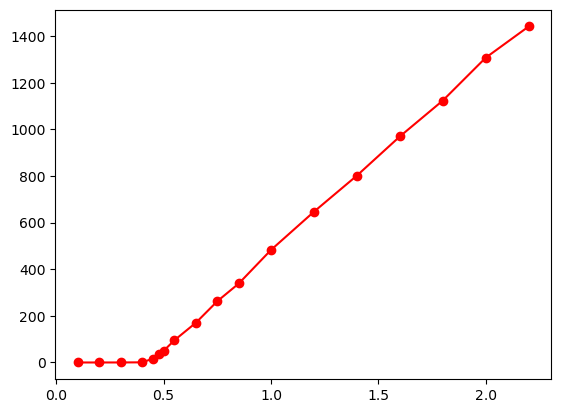

In [20]:
plt.plot(I, P,marker='o', label='Data',color='r')
plt.show()

In [7]:
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(I[5:-1],P[5:-1])   
print('slope:',slope)
print('intercept:',intercept)
print('r_value:',r_value)

slope: 833.9718154365684
intercept: -364.27998343994545
r_value: 0.9998665725335598


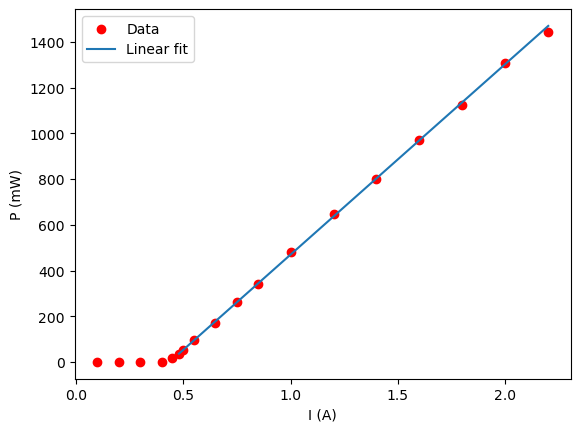

In [23]:
plt.scatter(I[:], P[:],marker='o', label='Data',color='red')
plt.plot(I[5:], slope*np.array(I[5:])+intercept, label='Linear fit')
plt.xlabel('I (A)')
plt.ylabel('P (mW)')
plt.legend()
plt.show()

In [38]:
intercept,slope

(-364.27998343994545, 833.9718154365684)

In [24]:
Current = np.linspace(0.5,2.2,18)

In [25]:
PYVO4 = [3.0, 32.3, 62.7, 97.5, 132.2, 166.9, 196, 229, 254, 
         278, 302, 324, 354, 370, 387, 406, 432, 460]

In [26]:
PYAG = [0.154, 28.5, 53.2, 87.7, 116.5, 136.0, 163.9, 194.9, 197, 214, 226, 246, 
        261, 279, 304, 333, 359, 403 
]

In [27]:
PYVO4 = np.array(PYVO4)
PYAG = np.array(PYAG)
PLD = slope*Current + intercept

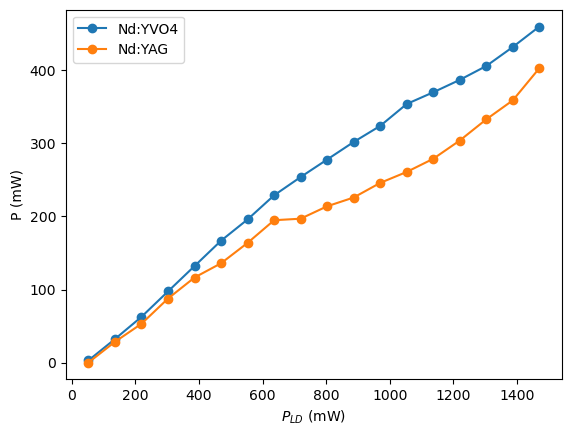

In [49]:
plt.plot(PLD, PYVO4, marker='o', label='Nd:YVO4')
plt.plot(PLD, PYAG, marker='o', label='Nd:YAG')
plt.xlabel('$P_{LD}$ (mW)')
plt.ylabel('P (mW)')
plt.legend()
plt.savefig('PYAG.png', dpi=300, bbox_inches='tight')
plt.show()

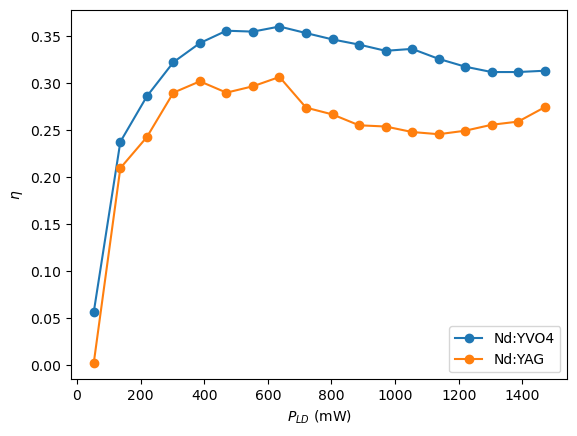

In [51]:
plt.plot(PLD, PYVO4/PLD, marker='o', label='Nd:YVO4')
plt.plot(PLD, PYAG/PLD, marker='o', label='Nd:YAG')
plt.xlabel('$P_{LD}$ (mW)')
plt.ylabel('$\eta$')
plt.legend()
plt.savefig('eff.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
IQ = [1.2 + 0.1*i for i in range(11)]
IQ[0] = 1.1

In [30]:
PQ = [3.2, 4.3, 6.5, 8.6, 10.0, 13.4, 18.1, 19.9, 22.2, 28.2, 34.5 ]

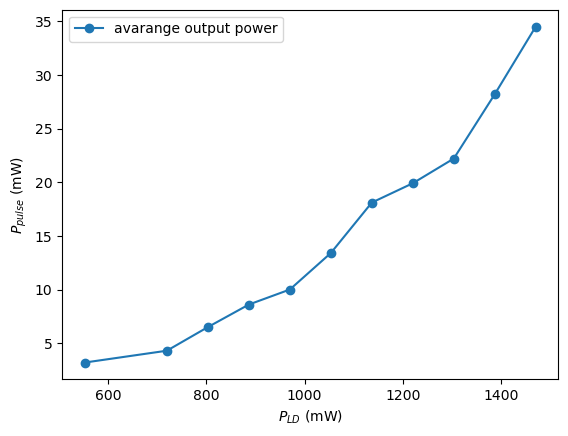

In [57]:
PLDQ = np.array(IQ)*slope+intercept
plt.plot(PLDQ, PQ, marker='o', label='avarange output power')
plt.xlabel('$P_{LD}$ (mW)')
plt.ylabel('$P_{pulse}$ (mW)')
plt.legend()
plt.savefig('PQ.png', dpi=300, bbox_inches='tight')
plt.show()

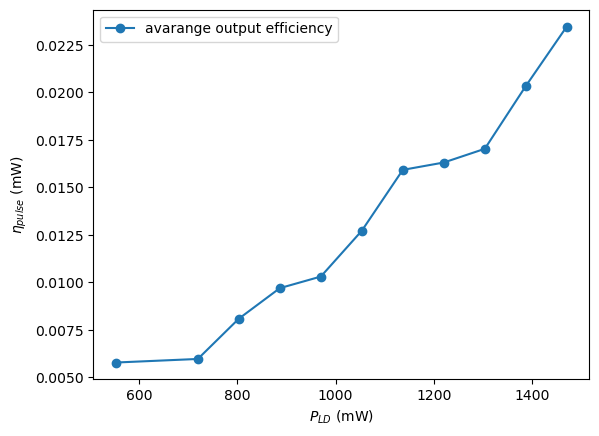

In [60]:
PLDQ = np.array(IQ)*slope+intercept
plt.plot(PLDQ, PQ/PLDQ, marker='o', label='avarange output efficiency')
plt.xlabel('$P_{LD}$ (mW)')
plt.ylabel('$\eta_{pulse}$ (mW)')
plt.legend()
plt.savefig('efQ.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
I2 = [0.7 + 0.1*i for i in range(16)]
I2[0] = 0.73

In [80]:
P2 = [0, 0.8, 1.0, 1.3, 1.65, 1.68, 2.01, 2.48, 2.85, 3.12, 3.61, 4.16,
      4.57, 5.05, 5.61, 6.21]
I2=np.array(I2)
P2=np.array(P2)

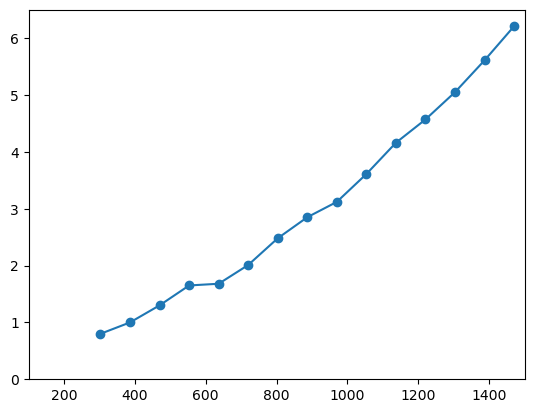

In [ ]:
PLD2 = I2*slope+intercept
plt.plot(PLD2[1:], P2[1:], marker='o', label='I2')
plt.ylim([0,6.5])
plt.xlim([100,1500])

plt.show()

In [113]:
coefs = np.polyfit(PLD2[1:], P2[1:],2)
coefs

array([2.08512941e-06, 8.94805684e-04, 3.69896807e-01])

In [92]:
x2 = np.linspace(200,1600, 100)
z2 = np.polyval(coefs, x2)

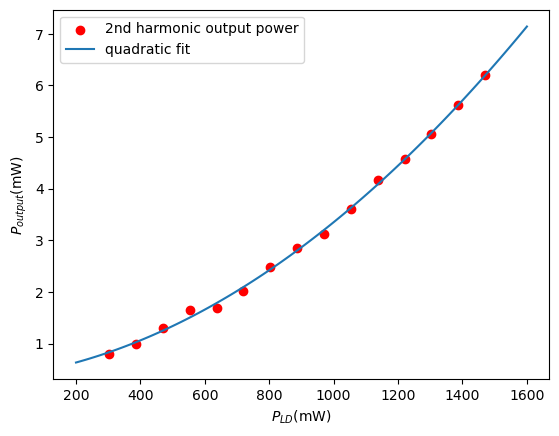

In [111]:
plt.scatter(PLD2[1:], P2[1:], marker='o',color='red',label = '2nd harmonic output power')
plt.plot(x2,z2,label= 'quadratic fit')
plt.xlabel('$P_{LD}$(mW)')
plt.ylabel('$P_{output}$(mW)')
plt.legend()
plt.savefig('2nd.png', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
bump = np.array([2.2,2.1,2.0,1.9,1.8,1.6])
width = np.array([205, 200,196, 203,205,200])
freq = np.array([13.7, 12.6, 10.7, 9.55, 6.667, 4.717])

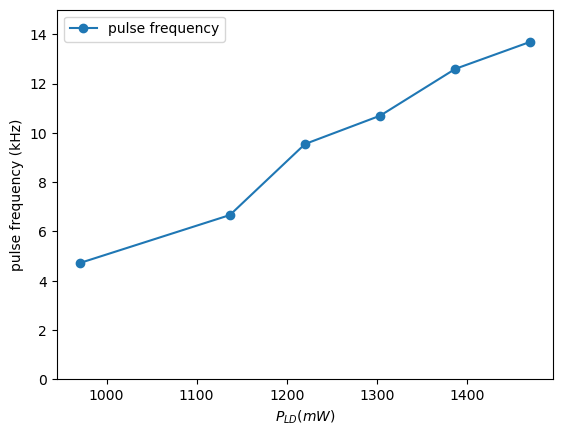

In [73]:
plt.plot(bump*slope+intercept, freq,marker='o',label='pulse frequency')
plt.ylim([0,15])
plt.xlabel('$P_{LD}(mW)$')
plt.ylabel('pulse frequency (kHz)')
plt.legend()
plt.savefig('freq.png', dpi=300, bbox_inches='tight')
plt.show()

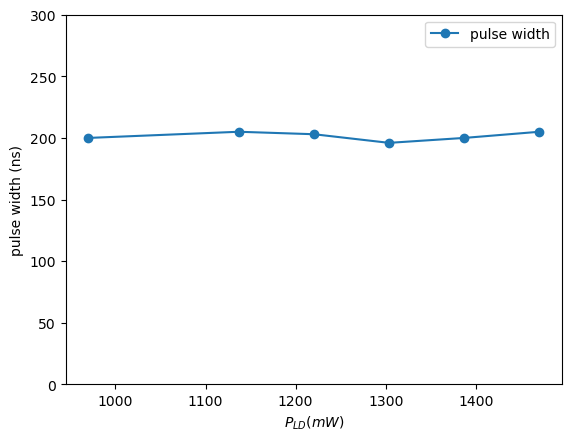

In [74]:
plt.plot(bump*slope+intercept, width,marker='o',label='pulse width')
plt.ylim([0,300])
plt.xlabel('$P_{LD}(mW)$')
plt.ylabel('pulse width (ns)')
plt.legend()
plt.savefig('width.png', dpi=300, bbox_inches='tight')
plt.show()

In [104]:
coefs

array([2.08512941e-06, 8.94805684e-04, 3.69896807e-01])